<h1> On The Limitations Of Subsampling </h1>

In [1]:
%matplotlib inline
from equadratures import *
import numpy as np

In [2]:
def fun(x):
        return 1.0/(1 + 50*(x[0]- 0.9)**2 + 50*(x[1] + 0.9)**2 )


In this notebook, we demonstrate the limitations of subsampling from a tensor grid. Specifically, we show how the function approximation via effectively subsampled quadratures may different substantially from the actual response, based on the location of the subsamples. This truly motivates an adaptive recipe (work in progress!). We begin by consider the following bivariate function:
$$ f(x_1, x_2) = \frac{1}{1 + 50 ( x_1 - 0.9 )^2 + 50 (x_2 + 0.9)^2) } $$

We may approximate it with a 2D tensor grid with 10 points in each direction:

In [3]:
value_large = 10
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value_large)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=value_large)
uq = Polyint([x1,x2])
p, w = uq.getPointsAndWeights()

Or we may use the effective subsampling technique with a hyperbolic basis with a q parameter of 0.3:

In [4]:
no_of_subsamples = 10
x1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
x2 = Parameter(param_type="Uniform", lower=-1, upper=1, points=no_of_subsamples)
parameters = [x1, x2]
Hyperbolic = IndexSet("Hyperbolic basis", orders=[no_of_subsamples-1,no_of_subsamples-1], q=0.3)
e = Polylsq(parameters, Hyperbolic)
minimum_subsamples = e.least_no_of_subsamples_reqd() 
e.set_no_of_evals(minimum_subsamples)
p, w = uq.getPointsAndWeights()
psmall = e.subsampled_quadrature_points

Now let's have a look at where exactly these subsamples lie

100 2
19 2
100 2
19 2


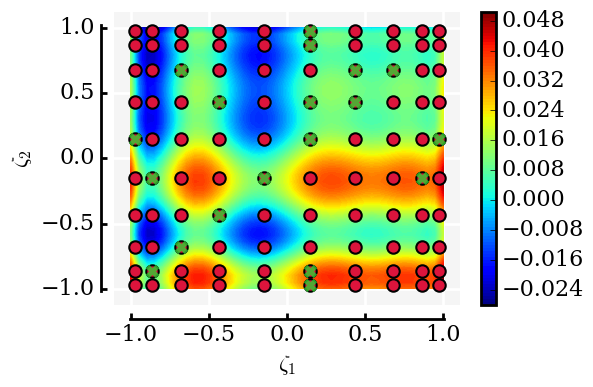

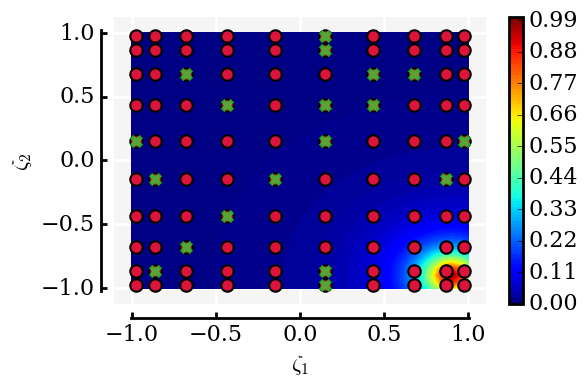

In [6]:
xvec = np.linspace(-1.,1.,40)                               
x,y = np.meshgrid(xvec, xvec)
z =  1.0/(1 + 50*(x - 0.9)**2 + 50*(y + 0.9)**2 )       
stackOfPoints, x1, x2 = meshgrid(-1.0, 1.0, 40, 40)
zapprox = e.getPolynomialApproximation(stackOfPoints, fun)              
zapprox = zapprox.reshape(40,40)
zapprox = zapprox.T
plotting.contour_plot(psmall, p, x, y, zapprox, 'EQ_approx.eps')
plotting.contour_plot(psmall, p, x, y , z, 'Real.eps')

In the figure above, the green points are from the tensor grid, while the red points are a few subsamples of that grid. It is readily apparent that the subsampled points fail to capture the jump in the function around (0.9, -0.9). The point to note here is that the subsampling procedure is invariant to the response of the function. 